In [1]:
#import pdf2image
import tabula
import pytesseract
import PIL
import pandas as pd
import re

## Q1: Use `tabula` to read and convert the pdf into a dataframe (5pts)

In [2]:
apple_df = tabula.read_pdf("Data/Q3 FY19 Consolidated Financial Statements.pdf", pandas_options={'header':None})
apple_df.head(3)

,0,1,2,3,4,5,6,7,8
0,NaN,NaN,"June 29,",NaN,"June 30,",NaN,"June 29,",NaN,"June 30,"
1,NaN,NaN,2019,NaN,2018,NaN,2019,NaN,2018
2,Net sales:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import os

In [4]:
def pdf2panda(file):
    df = tabula.read_pdf(file)
    return df

In [5]:
file = os.path.join('Data','English','Scanned_documents','worldpopulations.pdf')
pdf_output = pdf2panda(file)
print(pdf_output)

The output file is empty.


None


If the output says `file is empty` then we know `tabula` is not a good choice. Mainly, because this PDF obiously was created from an image which means we need to figure out other options

## Q2: Write a function that converts a PDF into an image and then pass it to the OCR. The function should return a list (5 pts)

### *I was not able to install 'poppler' successfully, so pdf2image failed. Therefore, I converted pdf through web-source 'https://pdftoimage.com/' to jpg.

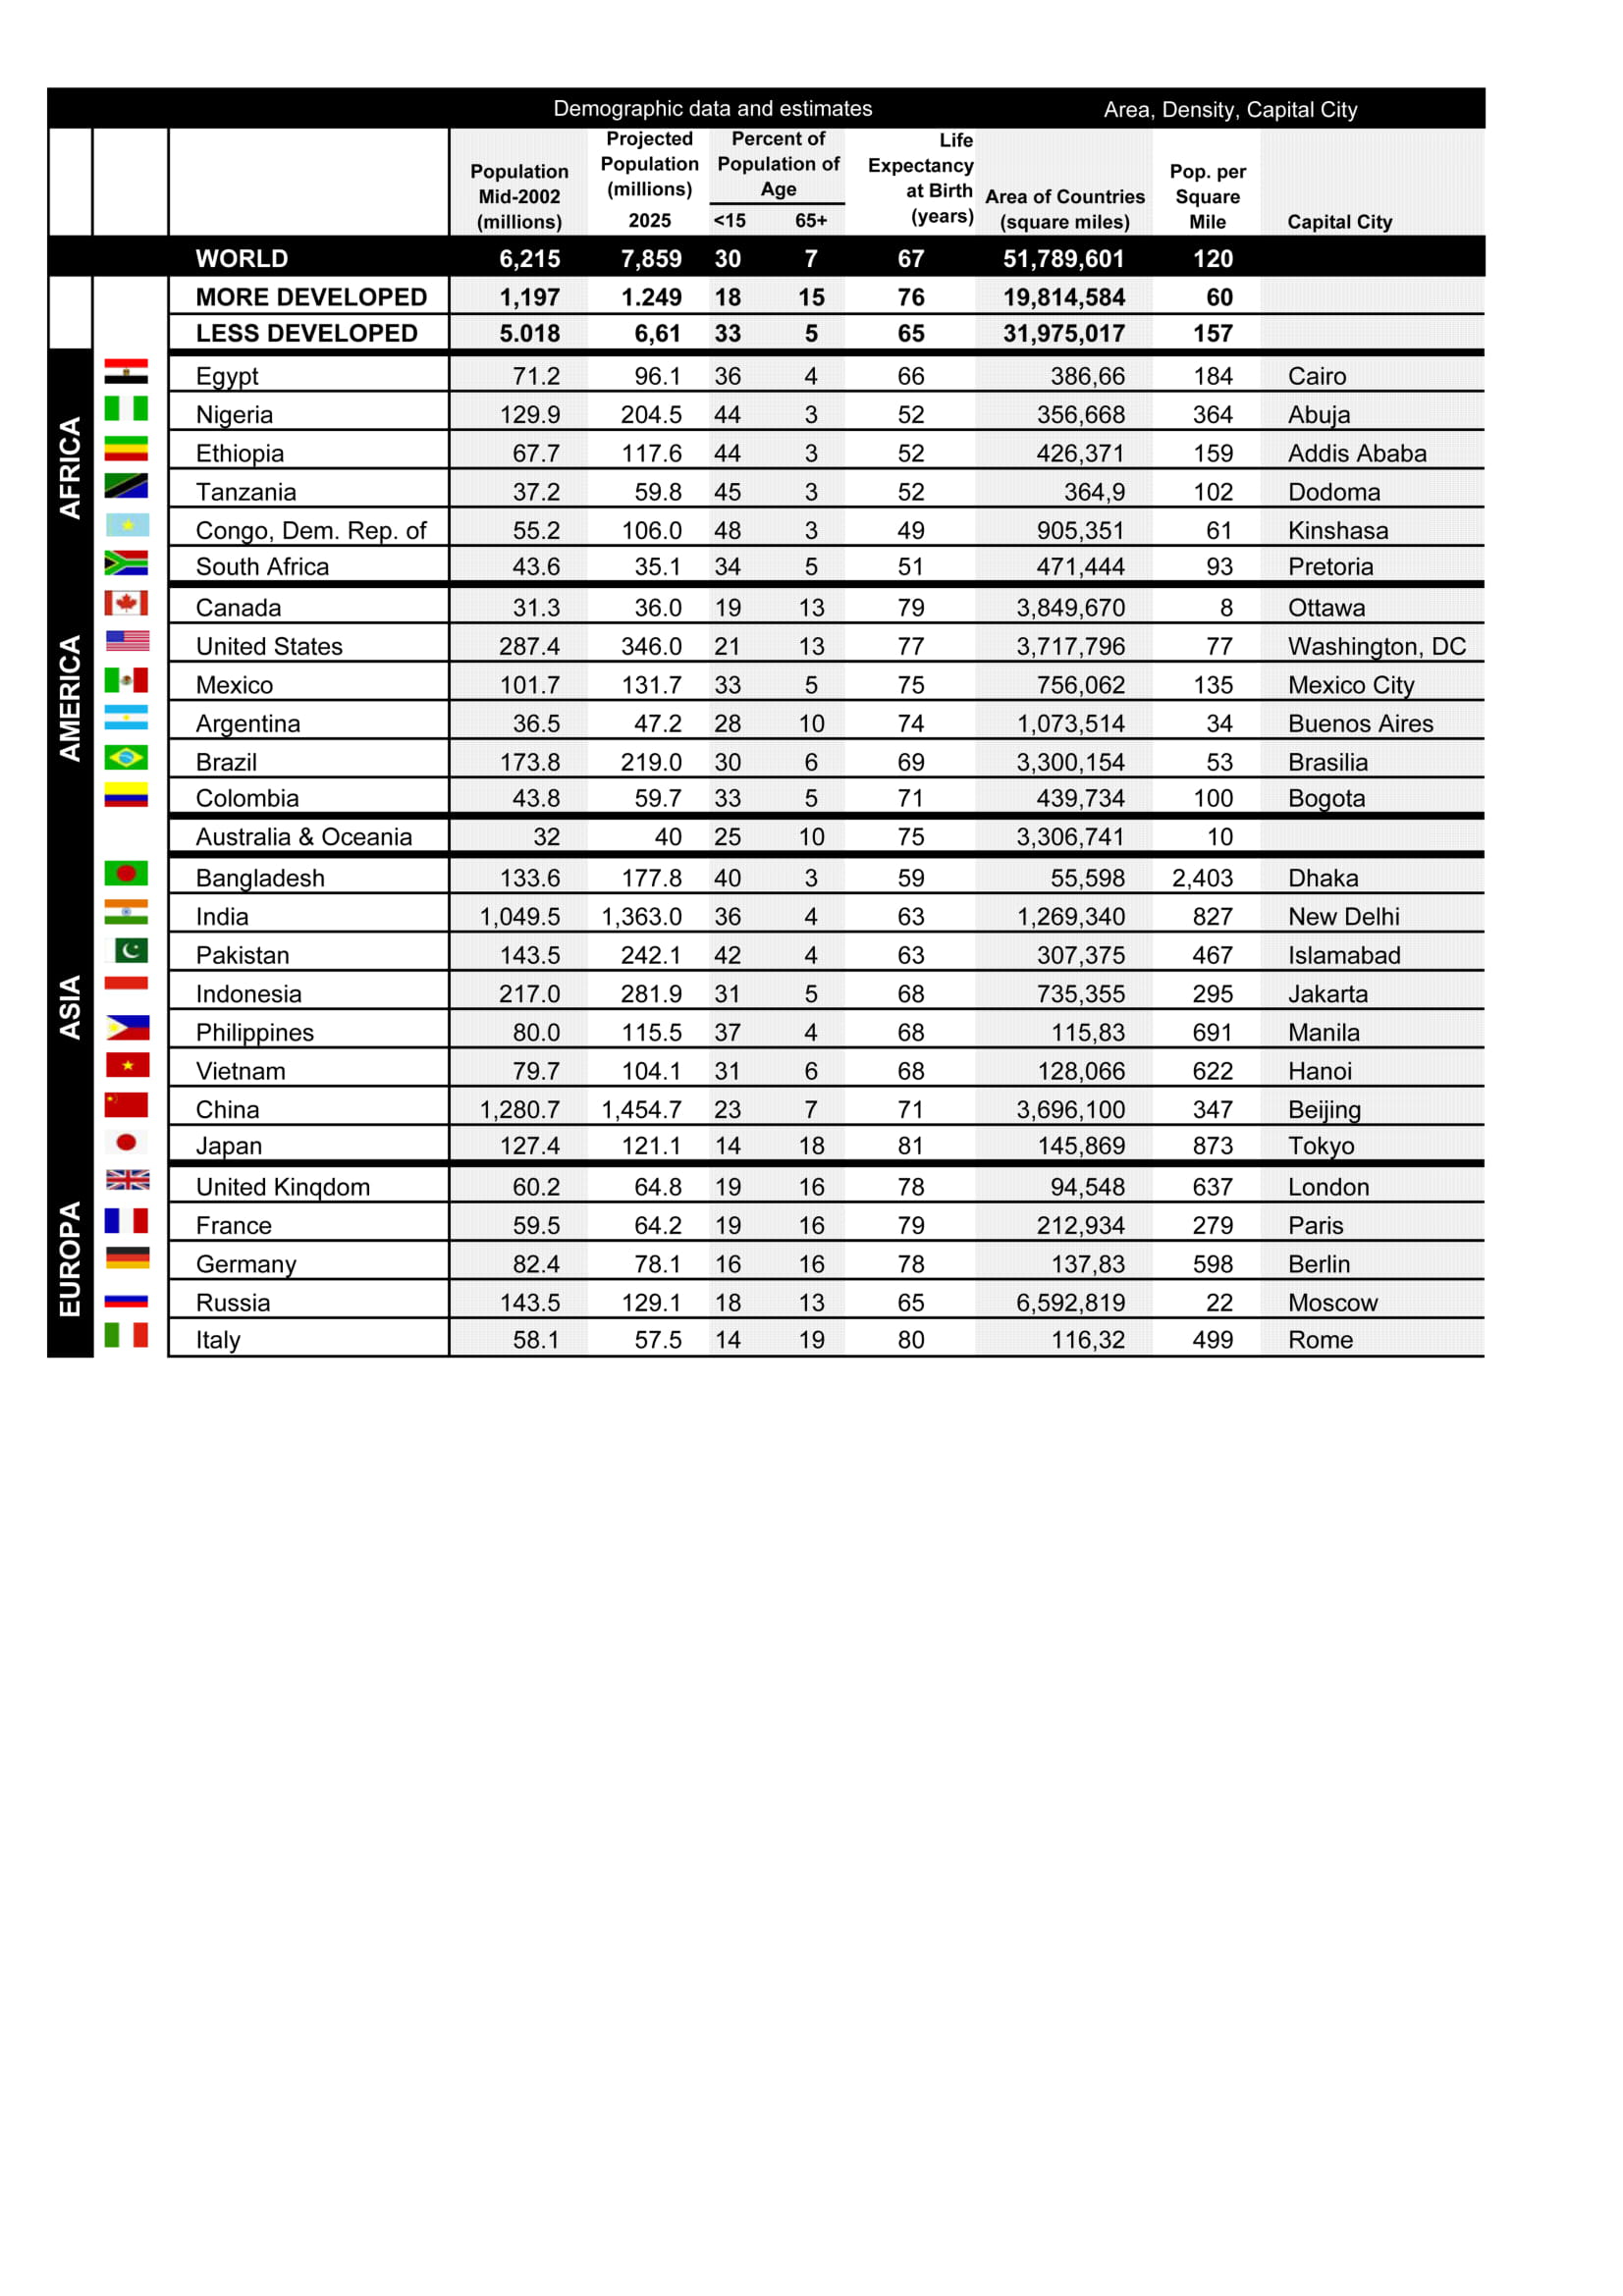

In [6]:
PIL.Image.open('worldpopulations.jpg')

In [7]:
jpg_to_str = pytesseract.image_to_string('worldpopulations.jpg')
jpg_to_str

'rN aster\n\nAMERICA\n\nPITY\n\nEUROPA\n\nDemographic data and estimates PN C-t- MBL -lals WA Or-1 11-1 MOLI]\n\n \n\n \n\n \n\n \n\nProjected Percent of Life\nPopulation Population Population of Expectancy Pop. per\nMid-2002 (millions) Age at Birth area of Countries Square\n(millions) 2025 <15 65+ (years) (square miles) Mile Capital City\nWORLD 6215 7,859 30 7 a Been PP\n1197 1.249 18 15 76 19,814,584 60\n5.018 661 33 5 65 31,975,017 157\n= 71.2 96.1 36 4 66 386,66 184 Cairo\naa 129.9 2045 44 3 52 356,668 364 Abuja\n= 677-1176 ~+44 3 52 426,371 159 __ Addis Ababa\nZz 37.2 598 45. 3 52 364,9 102 Dodoma\nS 552 106.0 48 3 49 905,351 61 Kinshasa\n= 43.6 35.1 34. 5 51 471,444 93 Pretoria\nI+] iS 36.0 19 13 79 3,849,670 8 Ottawa\n= 2874 346.0 21 13 77 3,717,796 77 Washington, DC\nBel | Mexico 10171) 131.7 _ (33) 15 75 756,062 135____ Mexico City\n— Argentina 36.5 47.2 28 10 74 1,073,514 34 Buenos Aires\nre 173.8 2190 30 6 69 3,300,154 53 Brasilia\n= 43.8 597 33. 5 71 439,734 100 Bogota\n32 

## Q3: Display the image (5 pts)

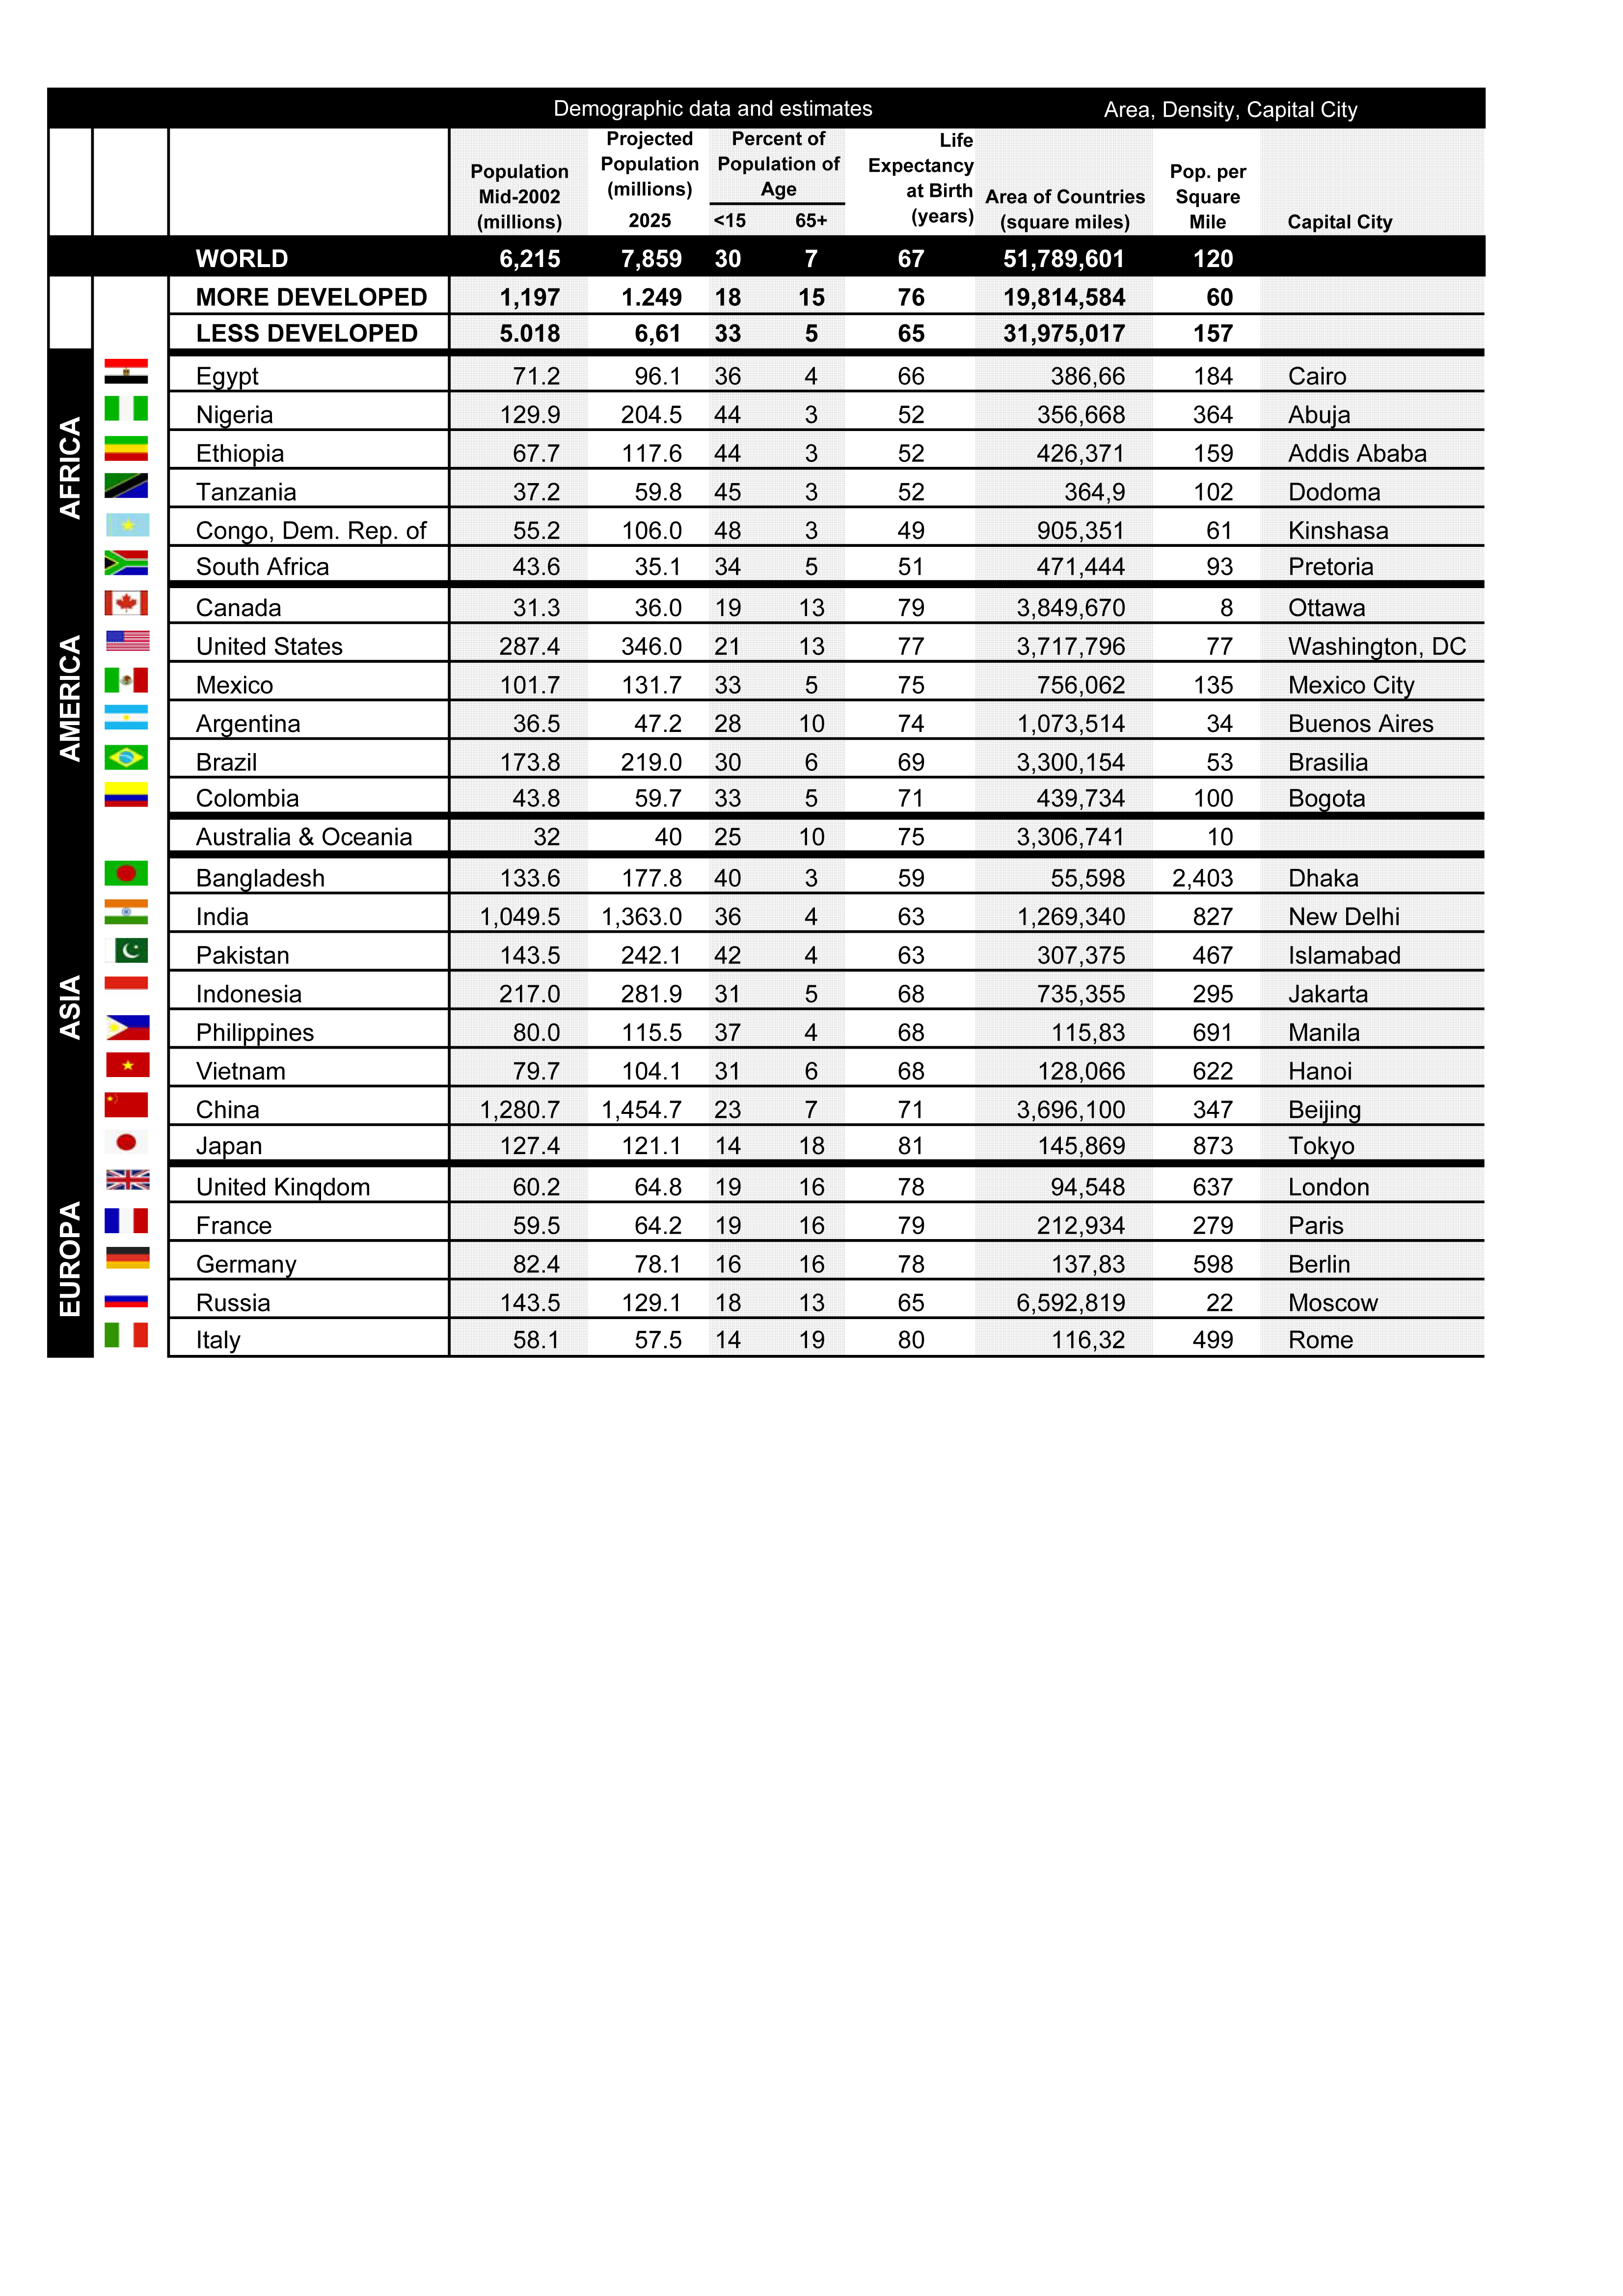

In [8]:
t2_file = os.path.join("Data", "English", "Scanned_documents", "t2.tif")
PIL.Image.open(t2_file)

In [9]:
t2_to_str = pytesseract.image_to_string(t2_file)
t2_to_str

'Demographic data and estimates Area, Density, Capital City\n\n \n\n \n\n \n\n \n\n \n\n \n\nVat e7.\n\n \n\n \n\n€\n\n \n\n \n\n \n\n \n\nAMERICA\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nASIA\n\n \n\n \n\n \n\nHOM IGHE PONSA\n\n \n\nNY\n“iit\n\n \n\n \n\n \n\nEUROPA\nIi\n\n \n\n \n\nProjected Percent of Life\n\nPopulation Population Population of Expectancy Pop. per\n\nMid-2002 ~=—(millions) Age at Birth Area of Countries Square\n\n(millions) 2025 <15 65+ (years) (square miles) Mile Capital City\nWORLD 6,215 7,859 30 7 oy 4 51,789,601 120\nMORE DEVELOPED 1,197 1.249 18 15 76 19,814,584 60\nLESS DEVELOPED 5.018 6,61 33 5 65 31,975,017 157\nEgypt 11.2 96.1 36 4 66 386,66 184 Cairo\nNigeria 129.9 204.5 44 o 52 356,668 364 Abuja\nEthiopia 67.7 117.6 44 3 52 426,371 159 Addis Ababa\nTanzania 37.2 59.8 45 3 52 364,9 102 Dodoma\nCongo, Dem. Rep. of 562 106.0 48 3 49 905,351 61 Kinshasa\nSouth Africa 43.6 35.1 34 5 51 471,444 93 Pretoria\nCanada 31.3 36.0 19 13 79 3,849,670 8 Ottawa\nUnited Stat

## Q4 was there any difference? (5 pts)
Compare the length between the two outputs. Which one was higher?

In [10]:
print(f'output from JPG format = {len(jpg_to_str)}')
print(f'output from TIF format = {len(t2_to_str)}')

output from JPG format = 1571
output from TIF format = 1834


## Q5 Extract a slice of data that containt the table information using regex (15 pts)

In [11]:
print(t2_to_str)

Demographic data and estimates Area, Density, Capital City

 

 

 

 

 

 

Vat e7.

 

 

€

 

 

 

 

AMERICA

 

 

 

 

 

 

 

ASIA

 

 

 

HOM IGHE PONSA

 

NY
“iit

 

 

 

EUROPA
Ii

 

 

Projected Percent of Life

Population Population Population of Expectancy Pop. per

Mid-2002 ~=—(millions) Age at Birth Area of Countries Square

(millions) 2025 <15 65+ (years) (square miles) Mile Capital City
WORLD 6,215 7,859 30 7 oy 4 51,789,601 120
MORE DEVELOPED 1,197 1.249 18 15 76 19,814,584 60
LESS DEVELOPED 5.018 6,61 33 5 65 31,975,017 157
Egypt 11.2 96.1 36 4 66 386,66 184 Cairo
Nigeria 129.9 204.5 44 o 52 356,668 364 Abuja
Ethiopia 67.7 117.6 44 3 52 426,371 159 Addis Ababa
Tanzania 37.2 59.8 45 3 52 364,9 102 Dodoma
Congo, Dem. Rep. of 562 106.0 48 3 49 905,351 61 Kinshasa
South Africa 43.6 35.1 34 5 51 471,444 93 Pretoria
Canada 31.3 36.0 19 13 79 3,849,670 8 Ottawa
United States 287.4 346.0 21 13 77 3,/17,796 77 Washington, DC
Mexico 101.7 131.7 33 5 75 756,062 135 M

In [12]:
regex = re.compile(r'(Egypt|Rome)')
matches = regex.finditer(t2_to_str)

idx = []
for match in matches:
    idx.append([match.start(), match.end()])
idx

[[560, 565], [1830, 1834]]

In [15]:
dataslice = t2_to_str[idx[0][0]:idx[1][1]]
print(dataslice)

Egypt 11.2 96.1 36 4 66 386,66 184 Cairo
Nigeria 129.9 204.5 44 o 52 356,668 364 Abuja
Ethiopia 67.7 117.6 44 3 52 426,371 159 Addis Ababa
Tanzania 37.2 59.8 45 3 52 364,9 102 Dodoma
Congo, Dem. Rep. of 562 106.0 48 3 49 905,351 61 Kinshasa
South Africa 43.6 35.1 34 5 51 471,444 93 Pretoria
Canada 31.3 36.0 19 13 79 3,849,670 8 Ottawa
United States 287.4 346.0 21 13 77 3,/17,796 77 Washington, DC
Mexico 101.7 131.7 33 5 75 756,062 135 Mexico City
Argentina 36.5 47.2 28 10 74 1,073,514 34 Buenos Aires
Brazil 173.8 219.0 30 6 69 3,300,154 53 Brasilia
Colombia 43.8 59.7 33 o 71 439,734 100 Bogota
Australia & Oceania 32 40 25 10 75 3,306,741 10
Bangladesh 133.6 177.8 40 3 59 55,598 2,403 Dhaka
India 1,049.5 1,363.0 36 4 63 1,269,340 827 New Delhi
Pakistan 143.5 242.1 42 4 63 307,375 467 Islamabad
Indonesia 217.0 281.9 31 5 68 735,355 295 Jakarta
Philippines 80.0 115.5 37 4 68 115,83 691 Manila
Vietnam 19.7 104.1 31 6 68 128,066 622 Hanoi
China 1,280.7 1,454.7 23 7 71 3,696,100 347 Beijing


## Q6 Now, use Regex again to extract the remaining data and insert into a Data Frame (15 pts)

In [16]:
data_list = dataslice.split('\n')

In [17]:
data_converted = []

for line in data_list:
    # Find words in string
    country = re.compile(r'\D+')
    countries = country.finditer(line)
    words = []
    # Find country location and extract to dict
    for c in countries:
        append_dict = {}
        words.append([c.start(), c.end()])
        append_dict['country'] = line[words[0][0]:words[0][1]-1]

    # Find Numbers in string
    pop = re.compile(r'\d+[,.]?\d+[,.]?\d+|\d+')
    pops = pop.finditer(line)
    nums1 = []

    # Find Population location and extract to dict
    for p in pops:
        nums1.append([p.start(), p.end()])
        append_dict['Population (2002)'] = line[nums1[0][0]:nums1[0][1]]
    
    # Find Projected location and extract to dict
    append_dict['Projected Population (2025)'] = line[nums1[1][0]:nums1[1][1]]

    data_converted.append(append_dict)
data_converted

[{'country': 'Egypt',
  'Population (2002)': '11.2',
  'Projected Population (2025)': '96.1'},
 {'country': 'Nigeria',
  'Population (2002)': '129.9',
  'Projected Population (2025)': '204.5'},
 {'country': 'Ethiopia',
  'Population (2002)': '67.7',
  'Projected Population (2025)': '117.6'},
 {'country': 'Tanzania',
  'Population (2002)': '37.2',
  'Projected Population (2025)': '59.8'},
 {'country': 'Congo, Dem. Rep. of',
  'Population (2002)': '562',
  'Projected Population (2025)': '106.0'},
 {'country': 'South Africa',
  'Population (2002)': '43.6',
  'Projected Population (2025)': '35.1'},
 {'country': 'Canada',
  'Population (2002)': '31.3',
  'Projected Population (2025)': '36.0'},
 {'country': 'United States',
  'Population (2002)': '287.4',
  'Projected Population (2025)': '346.0'},
 {'country': 'Mexico',
  'Population (2002)': '101.7',
  'Projected Population (2025)': '131.7'},
 {'country': 'Argentina',
  'Population (2002)': '36.5',
  'Projected Population (2025)': '47.2'},


In [18]:
df_converted = pd.DataFrame(data_converted)
df_converted

,country,Population (2002),Projected Population (2025)
0,Egypt,11.2,96.1
1,Nigeria,129.9,204.5
2,Ethiopia,67.7,117.6
3,Tanzania,37.2,59.8
4,"Congo, Dem. Rep. of",562,106.0
5,South Africa,43.6,35.1
6,Canada,31.3,36.0
7,United States,287.4,346.0
8,Mexico,101.7,131.7
9,Argentina,36.5,47.2


## Q6: Pandas data cleanup and visualization (15 pts)

In [19]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
country                        26 non-null object
Population (2002)              26 non-null object
Projected Population (2025)    26 non-null object
dtypes: object(3)
memory usage: 752.0+ bytes


In [20]:
df_converted['Population (2002)'] = df_converted['Population (2002)'].str.replace(",","")
df_converted['Population (2002)'] = df_converted['Population (2002)'].astype(float)

In [21]:
df_converted['Projected Population (2025)'] = df_converted['Projected Population (2025)'].str.replace(",","")
df_converted['Projected Population (2025)'] = df_converted['Projected Population (2025)'].astype(float)

In [22]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
country                        26 non-null object
Population (2002)              26 non-null float64
Projected Population (2025)    26 non-null float64
dtypes: float64(2), object(1)
memory usage: 752.0+ bytes


In [23]:
import matplotlib.pyplot as plt

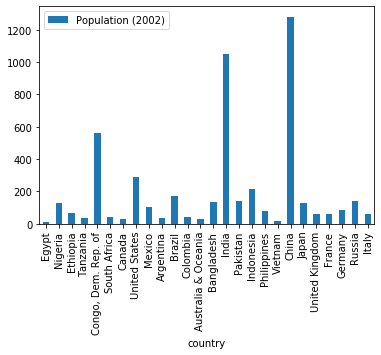

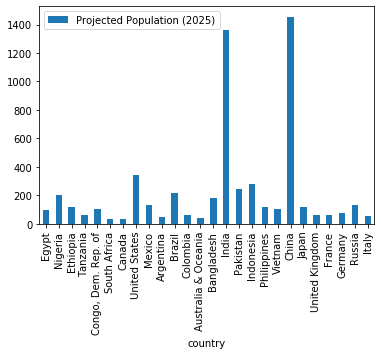

In [24]:
df_converted.plot.bar(x='country',y='Population (2002)')
df_converted.plot.bar(x='country',y='Projected Population (2025)')
plt.show()

In [25]:
china = pd.read_csv('Data/China/API_CHN_DS2_en_csv_v2_615059.csv', 
                    skip_blank_lines=True, 
                    skiprows=4)
indicators = ['Population ages 15-64, total', 'Population ages 0-14, total']
chinapop = china[china['Indicator Name'].isin(indicators)].iloc[:,:-2]

In [26]:
# let's pick one slice and examine Adults
adults = chinapop.iloc[:1, 4:]
adults

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
10,376823164.0,372520588.0,373118860.0,379332695.0,386528523.0,396196818.0,405508463.0,416669512.0,429726357.0,443537016.0,...,974558542.0,980077454.0,984319837.0,988398458.0,991985917.0,994542472.0,995702268.0,995434082.0,994288090.0,991653198.0


## Q7: Convert the `adults` to the format below (5 pts)

In [27]:
adults = adults.T.reset_index()

In [28]:
adults = adults.rename(columns={'index':'variable',10:'value'})
adults

,variable,value
0,1960,376823164.0
1,1961,372520588.0
2,1962,373118860.0
3,1963,379332695.0
4,1964,386528523.0
5,1965,396196818.0
6,1966,405508463.0
7,1967,416669512.0
8,1968,429726357.0
9,1969,443537016.0


## Q7 Rename the column `variable` to `year` (5 pts)

In [30]:
adults.rename(columns={'variable':'year'},inplace=True)
adults

,year,value
0,1960,376823164.0
1,1961,372520588.0
2,1962,373118860.0
3,1963,379332695.0
4,1964,386528523.0
5,1965,396196818.0
6,1966,405508463.0
7,1967,416669512.0
8,1968,429726357.0
9,1969,443537016.0


In [31]:
adults = adults.set_index('year')

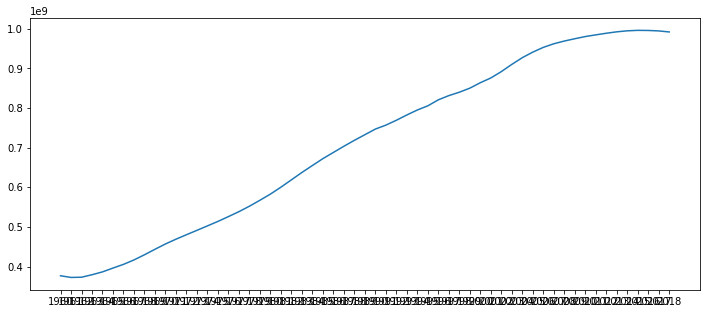

In [32]:
plt.figure(figsize=(12,5))
plt.plot(adults)
plt.show()

## Q8: Convert the index to datetime (5 pts)

In [33]:
adults.index = pd.to_datetime(adults.index)

In [34]:
adults.index

DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
      

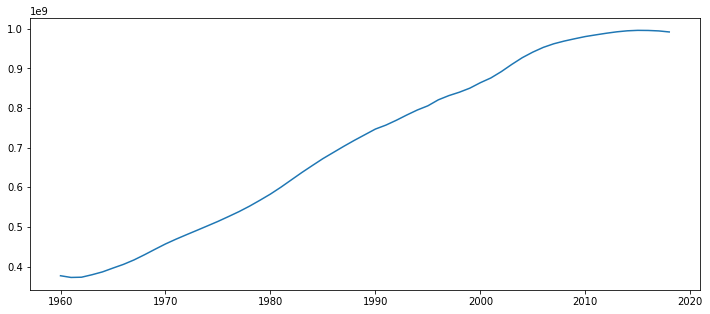

In [35]:
# Let's try the plot again
plt.figure(figsize=(12,5))
plt.plot(adults)
plt.show()

## Q9: Follow the sames steps but this time for the children (15 pts)

In [36]:
children = chinapop.iloc[1:2, 4:]

children = children.T.reset_index()
children = children.rename(columns={'index':'year',22:'value'})
children = children.set_index('year')

children

,value
year,
1960,265641893.0
1961,263302831.0
1962,268188604.0
1963,278443818.0
1964,287297670.0
1965,294501997.0
1966,304216738.0
1967,310976161.0
1968,316601067.0


In [37]:
children.index = pd.to_datetime(children.index)

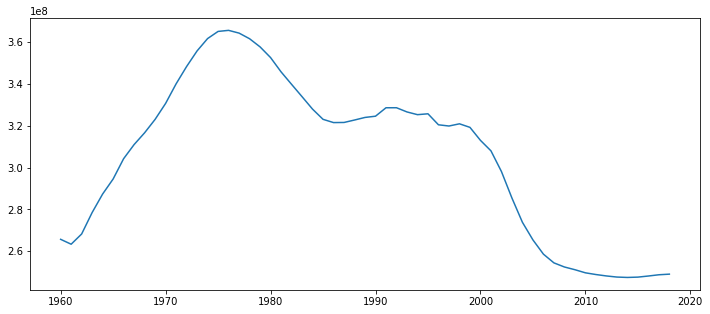

In [38]:
plt.figure(figsize=(12,5))
plt.plot(children)
plt.show()

## Q10: I was able to combine into one chart. When you look at this, do you see any alarming trend? What are your thoughts? (5 pts)


In [39]:
combined_df = adults.merge(children,how='inner',on='year')
combined_df.columns = ['Ages 15 to 64','Ages 0 to 14']
combined_df

,Ages 15 to 64,Ages 0 to 14
year,,
1960-01-01,376823164.0,265641893.0
1961-01-01,372520588.0,263302831.0
1962-01-01,373118860.0,268188604.0
1963-01-01,379332695.0,278443818.0
1964-01-01,386528523.0,287297670.0
1965-01-01,396196818.0,294501997.0
1966-01-01,405508463.0,304216738.0
1967-01-01,416669512.0,310976161.0
1968-01-01,429726357.0,316601067.0


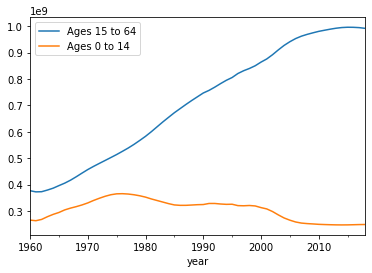

In [40]:
combined_df.plot()
plt.show()

### Observations:
* Observing only by data and chart, population growth matches and steadies each other until about 1975.
* Adult population keeps its rise until 2010 then the growth significantly drops to almost flatten.
* Children population slowly decrease every decade and eventually starting year 2010, children population hits lower than year 1960s.

### My Thoughts:
* Whatever factor that impacted children population to decrease starting from around year 1975, starts to show impact on the adult population starting from year around 2010. This leads me to think that birthrate or children population only starts to take its toll only after 20-30 years. 